# Szegedy C. et al., 2016

Szegedy, C., Vanhoucke, V., Ioffe, S., Shlens, J., & Wojna, Z. (2016). Rethinking the inception architecture for computer vision. In Proceedings of the IEEE conference on computer vision and pattern recognition (pp. 2818-2826).

- Incorpores preproceses and augmentation layers
- Changes Output layer

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Entorno de Ejecución


---



In [ ]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Tue Aug 29 22:59:25 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA A100-SXM...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   33C    P0    49W / 400W |      0MiB / 40960MiB |      0%      Default |
|                               |                      |             Disabled |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('Not using a high-RAM runtime')
else:
  print('You are using a high-RAM runtime!')

Your runtime has 89.6 gigabytes of available RAM

You are using a high-RAM runtime!


In [ ]:
import numpy as np
import os
# import pandas as pd
import matplotlib.pyplot as plt
import tensorflow.keras as K
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.optimizers import Adam
from keras.applications import inception_v3

# Creating dataset and model

In [ ]:
img_train = '/content/drive/MyDrive/Colab Notebooks/ProyFinal/Achive/train'


traindataset = K.utils.image_dataset_from_directory(img_train,
                                                    label_mode='categorical',
#                                                     color_mode='grayscale',
                                                    batch_size=32,
                                                    image_size=(48,48),
                                                    seed=7,
                                                    )

img_test = '/content/drive/MyDrive/Colab Notebooks/ProyFinal/Achive/test'

testdataset = K.utils.image_dataset_from_directory(img_test,
                                                    label_mode='categorical',
#                                                     color_mode='grayscale',
                                                    batch_size=32,
                                                    image_size=(48,48),
                                                    seed=7,
                                                    )


Found 28729 files belonging to 7 classes.
Found 7208 files belonging to 7 classes.


In [ ]:
inception = inception_v3.InceptionV3(include_top=False)

87910968/87910968 [==============================] - 5s 0us/step


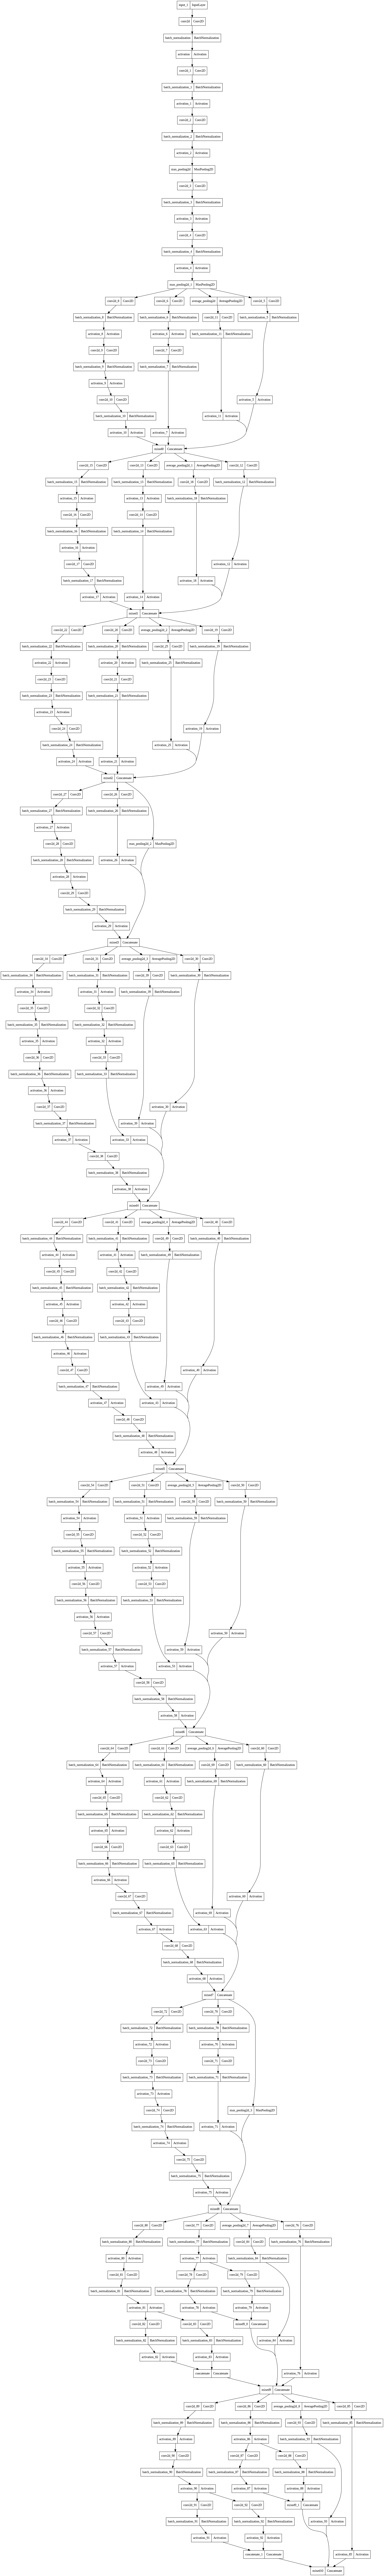

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(inception,  to_file='/content/drive/MyDrive/Colab Notebooks/ProyFinal/Achive/pruebas/inceptionv3.png')

In [ ]:
for i, layer in enumerate(inception.layers):
    print('num {}, name = {}'.format(i, layer.name))

num 0, name = input_1
num 1, name = conv2d
num 2, name = batch_normalization
num 3, name = activation
num 4, name = conv2d_1
num 5, name = batch_normalization_1
num 6, name = activation_1
num 7, name = conv2d_2
num 8, name = batch_normalization_2
num 9, name = activation_2
num 10, name = max_pooling2d
num 11, name = conv2d_3
num 12, name = batch_normalization_3
num 13, name = activation_3
num 14, name = conv2d_4
num 15, name = batch_normalization_4
num 16, name = activation_4
num 17, name = max_pooling2d_1
num 18, name = conv2d_8
num 19, name = batch_normalization_8
num 20, name = activation_8
num 21, name = conv2d_6
num 22, name = conv2d_9
num 23, name = batch_normalization_6
num 24, name = batch_normalization_9
num 25, name = activation_6
num 26, name = activation_9
num 27, name = average_pooling2d
num 28, name = conv2d_5
num 29, name = conv2d_7
num 30, name = conv2d_10
num 31, name = conv2d_11
num 32, name = batch_normalization_5
num 33, name = batch_normalization_7
num 34, name = b

In [ ]:
for layer in inception.layers[:279]:
    layer.trainable = False

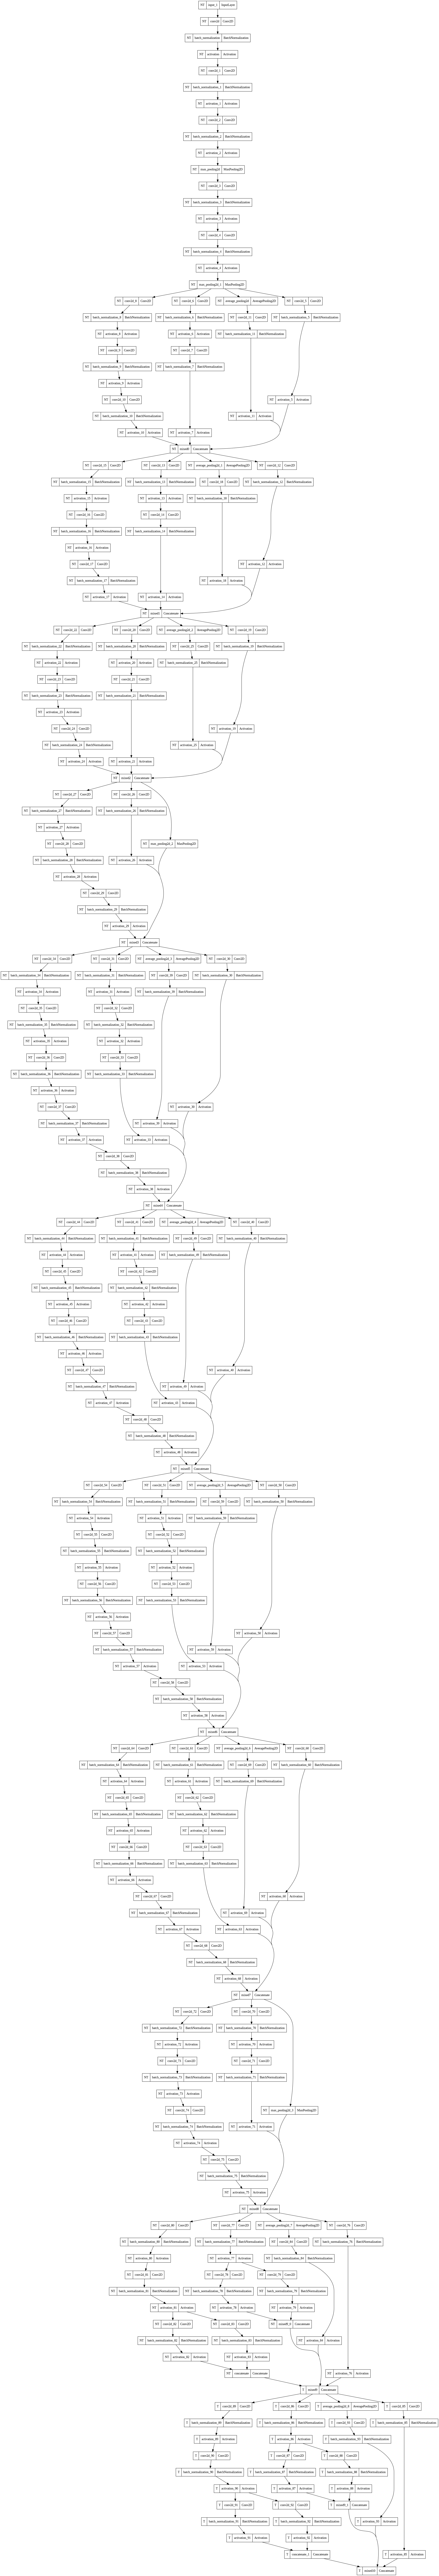

In [ ]:
plot_model(inception,  show_trainable=True, to_file='/content/drive/MyDrive/Colab Notebooks/ProyFinal/Achive/pruebas/inceptionv3NT.png')

In [ ]:
model_path = '/content/drive/MyDrive/Colab Notebooks/ProyFinal/Achive/InceptionV3.h5'

input = K.Input(shape=(48, 48, 3))

x = input
x = K.layers.experimental.preprocessing.Resizing(299, 299)(x)
x = inception_v3.preprocess_input(x)
x = K.layers.experimental.preprocessing.RandomFlip('horizontal', 0)(x)
x = K.layers.experimental.preprocessing.RandomContrast([0.9, 1.1], 1)(x)
x = K.layers.experimental.preprocessing.RandomRotation((-0.2, 0.3), seed=2)(x)

x = inception(x)

x = Flatten()(x)

x = Dense(4096, activation='relu', kernel_initializer='he_normal')(x)
x = Dropout(0.5)(x)
x = Dense(4096, activation='relu', kernel_initializer='he_normal')(x)
x = Dropout(0.5)(x)

output = Dense(7, activation='softmax', kernel_initializer='he_normal')(x)

model = K.Model(input, output)

model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 48, 48, 3)]       0         
                                                                 
 resizing (Resizing)         (None, 299, 299, 3)       0         
                                                                 
 tf.math.truediv (TFOpLambda  (None, 299, 299, 3)      0         
 )                                                               
                                                                 
 tf.math.subtract (TFOpLambd  (None, 299, 299, 3)      0         
 a)                                                              
                                                                 
 random_flip (RandomFlip)    (None, 299, 299, 3)       0         
                                                                 
 random_contrast (RandomCont  (None, 299, 299, 3)      0     

In [ ]:
def scheduler(epoch, lr):
    if epoch < 1:
        return lr
    else:
        return lr * tf.math.exp(-0.1)

best = [K.callbacks.ModelCheckpoint(model_path,
                                   save_best_only=True),
       K.callbacks.LearningRateScheduler(scheduler)
#        K.callbacks.EarlyStopping(monitor='val_loss',
#                                 patience=5,
#                                 verbose=1)
       ]

history = model.fit(traindataset,
                    validation_data=testdataset,
                    epochs=100,
                    verbose=True,
                    callbacks=best)

Epoch 1/100
898/898 [==============================] - 2416s 3s/step - loss: 2.4086 - accuracy: 0.2686 - val_loss: 1.5926 - val_accuracy: 0.3498 - lr: 1.0000e-04
Epoch 2/100
898/898 [==============================] - 67s 72ms/step - loss: 1.6902 - accuracy: 0.3216 - val_loss: 1.5356 - val_accuracy: 0.4143 - lr: 9.0484e-05
Epoch 3/100
898/898 [==============================] - 67s 75ms/step - loss: 1.6389 - accuracy: 0.3466 - val_loss: 1.5169 - val_accuracy: 0.3933 - lr: 8.1873e-05
Epoch 4/100
898/898 [==============================] - 43s 47ms/step - loss: 1.6019 - accuracy: 0.3592 - val_loss: 1.5215 - val_accuracy: 0.4237 - lr: 7.4082e-05
Epoch 5/100
898/898 [==============================] - 63s 70ms/step - loss: 1.5707 - accuracy: 0.3816 - val_loss: 1.4852 - val_accuracy: 0.4616 - lr: 6.7032e-05
Epoch 6/100
898/898 [==============================] - 64s 71ms/step - loss: 1.5534 - accuracy: 0.3846 - val_loss: 1.4522 - val_accuracy: 0.4620 - lr: 6.0653e-05
Epoch 7/100
898/898 [=======

In [ ]:
print(type(history.history))
print(history.history.keys())
largo = len(history.history['accuracy'])
largo

<class 'dict'>
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])


100

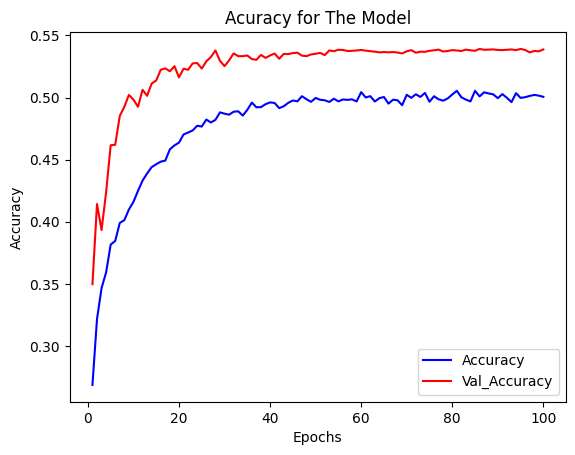

In [ ]:
# Review Accuracy

plt.plot(range(1, largo + 1), history.history['accuracy'], '-b', label='Accuracy')
plt.plot(range(1, largo + 1), history.history['val_accuracy'], '-r', label='Val_Accuracy')
plt.title('Acuracy for The Model')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
eval = model.evaluate(testdataset, verbose=True, use_multiprocessing=True, return_dict=True)

226/226 [==============================] - 5s 20ms/step - loss: 1.2662 - accuracy: 0.5387


In [ ]:
print(eval)

{'loss': 1.266174077987671, 'accuracy': 0.5387070178985596}


In [ ]:
prediction = model.predict(testdataset)

226/226 [==============================] - 5s 17ms/step


In [ ]:
print(prediction)
print(prediction.shape)

[[0.18463522 0.0307162  0.22479023 ... 0.22979642 0.17190714 0.11196693]
 [0.1552918  0.03026768 0.10836084 ... 0.15318817 0.16855595 0.03308355]
 [0.14301294 0.01421849 0.10261223 ... 0.36833614 0.2203284  0.03350123]
 ...
 [0.28893122 0.04273383 0.18349715 ... 0.1187076  0.28820586 0.02218244]
 [0.15786405 0.0149345  0.10512399 ... 0.31823406 0.25351194 0.02986454]
 [0.29901117 0.05828442 0.19204228 ... 0.03382325 0.04844661 0.06229668]]
(7208, 7)


In [ ]:
names = {k: v for v, k in enumerate(testdataset.class_names)}
print(names)

{'angry': 0, 'disgust': 1, 'fear': 2, 'happy': 3, 'neutral': 4, 'sad': 5, 'surprise': 6}


In [ ]:
y_true = []
y_pred = []

for x, y in testdataset:
    predictions = model.predict(x)

    predicted_classes = np.argmax(predictions, axis=1)

    true_classes = np.argmax(y.numpy(), axis=1)

    y_true.extend(true_classes)
    y_pred.extend(predicted_classes)


1/1 [==============================] - 1s 1s/step


In [ ]:
!pip install scikit-learn
!pip install seaborn

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

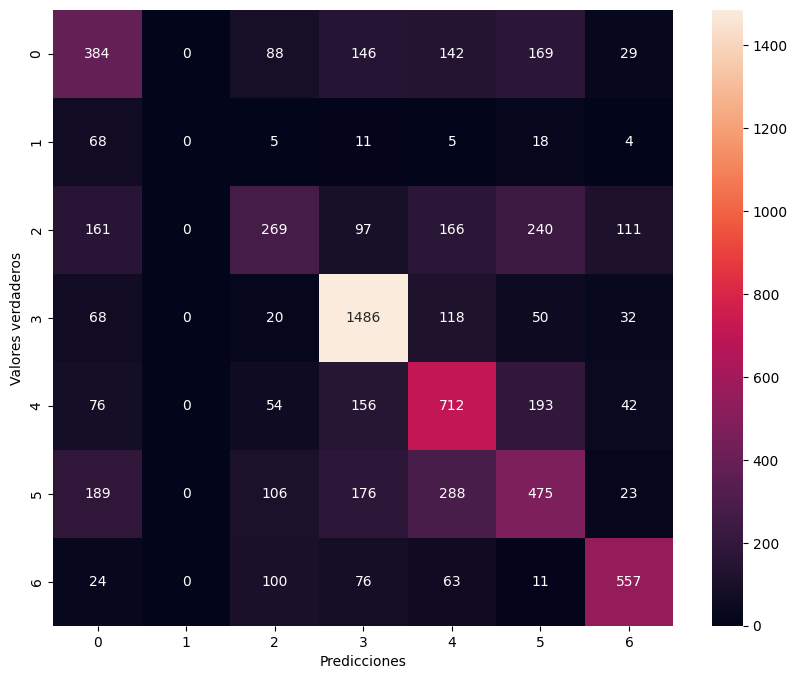

In [ ]:
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='g')
plt.xlabel('Predicciones')
plt.ylabel('Valores verdaderos')
plt.show()
